In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")

In [5]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

percentage of women who survived 74.20382165605095
percentage of men who survived 18.890814558058924


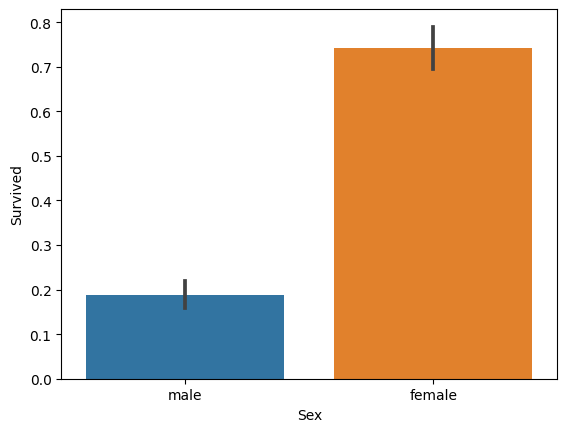

In [9]:
sns.barplot(x='Sex',y='Survived',data=train)
print("percentage of women who survived",train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print("percentage of men who survived",train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

percentage of class1 who survived 62.96296296296296
percentage of class2 who survived 47.28260869565217
percentage of class3 who survived 24.236252545824847


<Axes: xlabel='Pclass', ylabel='Survived'>

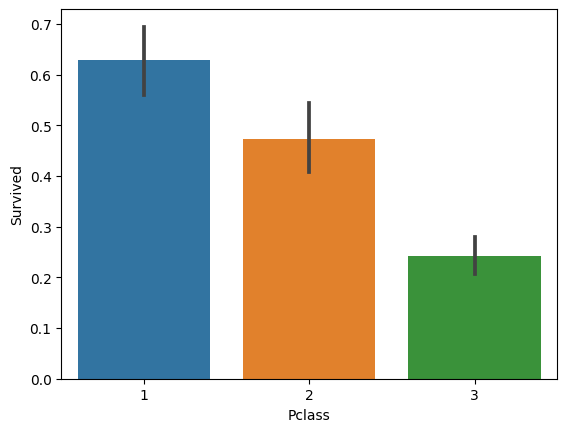

In [10]:
print("percentage of class1 who survived",train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print("percentage of class2 who survived",train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print("percentage of class3 who survived",train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

sns.barplot(x='Pclass',y='Survived',data=train)

In [11]:
train.Age=train.Age.fillna(-0.5)
test.Age=test.Age.fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','baby','child','teenager','Student','Young Adult','Adult','Senior']

train['AgeGroup']=pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

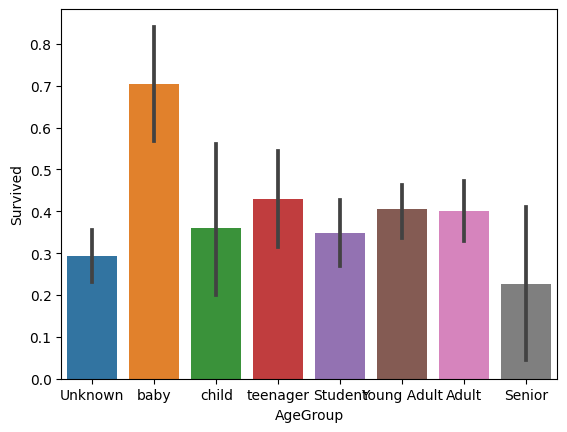

In [12]:
sns.barplot(data=train,x='AgeGroup',y="Survived")

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [14]:
train=train.drop(['Ticket','Cabin','Fare'],axis=1)
test=test.drop(['Ticket','Cabin','Fare'],axis=1)


In [15]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [16]:
southampton=train[train['Embarked']=='S'].shape[0]
print(southampton)
queen=train[train['Embarked']=='Q'].shape[0]
print(queen)
cher=train[train['Embarked']=='C'].shape[0]
print(cher)

644
77
168


In [17]:
train=train.fillna({'Embarked':'S'})

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult


In [19]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [20]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

pd.crosstab(train['Title'],train['Sex'])
    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

train[['Title','Survived']].groupby(['Title'],as_index=False).mean()
    


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [22]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [24]:
mr_age=train[train['Title']==1]['AgeGroup'].mode()
miss_age=train[train['Title']==2]['AgeGroup'].mode()
mrs_age=train[train['Title']==3]['AgeGroup'].mode()
master_age=train[train['Title']==4]['AgeGroup'].mode()
royal_age=train[train['Title']==5]['AgeGroup'].mode()
rare_age=train[train['Title']==6]['AgeGroup'].mode()

age_title_map={1:'Young Adult',2:'Student',3:'Adult',4:'Baby',5:'Adult',6:'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i]== 'Unknown':
        train['AgeGroup'][i]== age_title_map[train['Title'][i]]
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i]== 'Unknown':
        test['AgeGroup'][i]== age_title_map[test['Title'][i]]

In [25]:
miss_age

0    Unknown
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'baby' < 'child' < 'teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [26]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Unknown', 'baby', 'teenager', 'child', 'Senior']
Categories (8, object): ['Unknown' < 'baby' < 'child' < 'teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [27]:
for dataset in combine:
    dataset['AgeGroup']=dataset['AgeGroup'].replace('Unknown','Student')
    

/tmp/ipykernel_30/3544710218.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dataset['AgeGroup']=dataset['AgeGroup'].replace('Unknown','Student')


In [28]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'baby', 'teenager', 'child', 'Senior']
Categories (7, object): ['baby' < 'child' < 'teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Embarked     891 non-null    object  
 9   AgeGroup     891 non-null    category
 10  Title        891 non-null    int64   
dtypes: category(1), float64(1), int64(6), object(3)
memory usage: 71.0+ KB


In [31]:
test.AgeGroup.unique()

['Young Adult', 'Adult', 'Senior', 'Student', 'teenager', 'child', 'baby']
Categories (7, object): ['baby' < 'child' < 'teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [32]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Embarked         object
AgeGroup       category
Title             int64
dtype: object

In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,2,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transform=['Sex','AgeGroup','Embarked']



In [33]:
for i in transform:
    train[i]=le.fit_transform(train[i])

In [35]:
for i in transform:
    test[i]=le.fit_transform(test[i])

In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,2,3


**Machine Learning modeling part**

In [46]:
x_train=train.drop(['PassengerId','Name','Survived'],axis=1)
y_train=train['Survived']
x_test=test.drop(['PassengerId','Name'],axis=1)

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds=lr.predict(x_test)


In [51]:
ids=test['PassengerId']
output=pd.DataFrame({'PassengerId': ids,'Survived':preds})
output.to_csv("Submission.csv")


In [49]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
